## importing the package ##

In [83]:
# libraries

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import numpy as np

In [ ]:
np.__version__

In [3]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm

C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.0.0) requires spaCy v2.0 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
nlp = en_core_web_sm.load()

In [4]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
## nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the data ##

In [5]:
# Opening JSON file 
f = open('C:/Users/JU486WK/OneDrive - EY/Desktop/Text Classification/complaints-2021-05-14_08_16.json') 
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

In [6]:
df.shape

(78313, 22)

In [7]:
df = df.sample(1000)

In [8]:
df.shape

(1000, 22)

## Data preparation ##

In [9]:
df.head(5)

_index      _type      _id  _score    _source.tags  \
29932  complaint-public-v2  complaint  1534455     0.0  Older American   
10230  complaint-public-v2  complaint  3536016     0.0            None   
4650   complaint-public-v2  complaint  3876233     0.0            None   
70099  complaint-public-v2  complaint  1497482     0.0            None   
23190  complaint-public-v2  complaint   589024     0.0            None   

      _source.zip_code _source.complaint_id  \
29932            331XX              1534455   
10230             None              3536016   
4650              None              3876233   
70099            200XX              1497482   
23190            605XX               589024   

                                  _source.issue      _source.date_received  \
29932  Application, originator, mortgage broker  2015-08-25T12:00:00-05:00   
10230                       Managing an account  2020-02-18T12:00:00-05:00   
4650       Incorrect information on your report  2020-10-01T12:00:00-05:00   
70099  Loan servicing, payments, escrow account  2015-07-31T12:00:00-05:00   
23190  Loan modification,collection,foreclosure  2013-11-07T12:00:00-05:00   

      _source.state _source.consumer_disputed  \
29932            FL                        No   
10230          None                       N/A   
4650             FL                       N/A   
70099            DC                        No   
23190            IL                        No   

                                         _source.product  \
29932                                           Mortgage   
10230                        Checking or savings account   
4650   Credit reporting, credit repair services, or o...   
70099                                           Mortgage   
23190                                           Mortgage   

      _source.company_response       _source.company _source.submitted_via  \
29932  Closed with explanation  JPMORGAN CHASE & CO.                   Web   
10230  Closed with explanation  JPMORGAN CHASE & CO.              Referral   
4650   Closed with explanation  JPMORGAN CHASE & CO.                   Web   
70099  Closed with explanation  JPMORGAN CHASE & CO.                   Web   
23190  Closed with explanation  JPMORGAN CHASE & CO.                   Web   

      _source.date_sent_to_company _source.company_public_response  \
29932    2015-08-25T12:00:00-05:00                            None   
10230    2020-02-18T12:00:00-05:00                            None   
4650     2020-10-01T12:00:00-05:00                            None   
70099    2015-07-31T12:00:00-05:00                            None   
23190    2013-11-07T12:00:00-05:00                            None   

                    _source.sub_product _source.timely  \
29932                    Other mortgage            Yes   
10230  Other banking product or service            Yes   
4650                   Credit reporting            Yes   
70099       Conventional fixed mortgage            Yes   
23190       Conventional fixed mortgage            Yes   

                         _source.complaint_what_happened  \
29932  I am very dissatisfied with the results of my ...   
10230                                                      
4650   Chase Bank has denied my Identity Theft Claim ...   
70099  Payment was made to XXXX XXXX XXXX who transfe...   
23190                                                      

                                  _source.sub_issue  \
29932                                          None   
10230  Funds not handled or disbursed as instructed   
4650            Information belongs to someone else   
70099                                          None   
23190                                          None   

      _source.consumer_consent_provided  
29932                  Consent provided  
10230                               N/A  
4650                   Consent provided  
70099                  Consent provided  
23190                     

In [10]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [11]:
## Assign new column names ##
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

_source.complaint_what_happened  \
29932  I am very dissatisfied with the results of my ...   
10230                                                      
4650   Chase Bank has denied my Identity Theft Claim ...   
70099  Payment was made to XXXX XXXX XXXX who transfe...   
23190                                                      

                                         _source.product  \
29932                                           Mortgage   
10230                        Checking or savings account   
4650   Credit reporting, credit repair services, or o...   
70099                                           Mortgage   
23190                                           Mortgage   

                    _source.sub_product  
29932                    Other mortgage  
10230  Other banking product or service  
4650                   Credit reporting  
70099       Conventional fixed mortgage  
23190       Conventional fixed mortgage

In [12]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

complaint_text  \
29932  I am very dissatisfied with the results of my ...   
10230                                                      
4650   Chase Bank has denied my Identity Theft Claim ...   
70099  Payment was made to XXXX XXXX XXXX who transfe...   
23190                                                      

                                                category  \
29932                                           Mortgage   
10230                        Checking or savings account   
4650   Credit reporting, credit repair services, or o...   
70099                                           Mortgage   
23190                                           Mortgage   

                           sub_category  
29932                    Other mortgage  
10230  Other banking product or service  
4650                   Credit reporting  
70099       Conventional fixed mortgage  
23190       Conventional fixed mortgage

In [13]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

complaint_text  \
29932  I am very dissatisfied with the results of my ...   
10230                                                      
4650   Chase Bank has denied my Identity Theft Claim ...   
70099  Payment was made to XXXX XXXX XXXX who transfe...   
23190                                                      

                                                category  
29932                            Mortgage+Other mortgage  
10230  Checking or savings account+Other banking prod...  
4650   Credit reporting, credit repair services, or o...  
70099               Mortgage+Conventional fixed mortgage  
23190               Mortgage+Conventional fixed mortgage

In [14]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [15]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

743

In [16]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

743

In [17]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [18]:
## Prepare the text for topic modelling ##
'''
1. Make the text lowercase
2. Remove text in square brackets
3. Remove punctuation
4.Remove wordscontaining numbers
'''

'\n1. Make the text lowercase\n2. Remove text in square brackets\n3. Remove punctuation\n4.Remove wordscontaining numbers\n'

In [19]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [20]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

29932    i am very dissatisfied with the results of my ...
4650     chase bank has denied my identity theft claim ...
70099    payment was made to xxxx xxxx xxxx who transfe...
5052     i have been calling and emailing chase mortgag...
41838    jp morgan chase and xxxx xxxx in the executive...
Name: complaint_text, dtype: object

In [21]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

29932    i am very dissatisfied with the results of my ...
4650     chase bank has denied my identity theft claim ...
70099    payment was made to xxxx xxxx xxxx who transfe...
5052     i have been calling and emailing chase mortgag...
41838    jp morgan chase and xxxx xxxx in the executive...
Name: complaint_text, dtype: object

In [22]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_text','category']]
df_clean.head()

complaint_text  \
29932  i am very dissatisfied with the results of my ...   
4650   chase bank has denied my identity theft claim ...   
70099  payment was made to xxxx xxxx xxxx who transfe...   
5052   i have been calling and emailing chase mortgag...   
41838  jp morgan chase and xxxx xxxx in the executive...   

                                                category  
29932                            Mortgage+Other mortgage  
4650   Credit reporting, credit repair services, or o...  
70099               Mortgage+Conventional fixed mortgage  
5052                 Mortgage+Conventional home mortgage  
41838           Bank account or service+Checking account

In [23]:
#Write your function to extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [24]:
## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis ##
df_clean['complaint_text'] = df_clean['complaint_text'].str.replace('xxxx','')

In [25]:
#All masked texts has been removed
df_clean.head()

complaint_text  \
29932  i am very dissatisfied with the results of my ...   
4650   chase bank has denied my identity theft claim ...   
70099  payment was made to    who transferred my loan...   
5052   i have been calling and emailing chase mortgag...   
41838  jp morgan chase and   in the executive offices...   

                                                category  
29932                            Mortgage+Other mortgage  
4650   Credit reporting, credit repair services, or o...  
70099               Mortgage+Conventional fixed mortgage  
5052                 Mortgage+Conventional home mortgage  
41838           Bank account or service+Checking account

## Feature Extraction ##

In [ ]:
'''
Convert the raw texts to a matrix of TF-IDF features

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"
'''

In [ ]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [ ]:
##  Create a document term matrix using fit_transform
## The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score: The tuples that are not there have a tf-idf score of 0

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean) 

In [ ]:
tfidf.get_feature_names()[:10]

In [ ]:
'''
1. Topic modelling using LDA 
2. Latent Dirichlet Analysis (LDA) is one of the most frequent topic modeling methods analysts make use of. It is based on what is known as the distributional hypothesis which states that the semantics of words can be grasped by looking at the contexts the words appear in. In other words, under this hypothesis, the semantics of two words will be similar if they tend to occur in similar contexts.
3. That said, LDA computes how frequently words occur in the documents – and the whole corpus – and assumes that similar documents will contain approximately the same distribution of word frequencies for certain words. In this case, syntactic information (e.g. word order) and semantic information (e.g. the multiplicity of meanings of a given word) are ignored and each document is treated as a bag of words.
4. The standard method for computing word frequencies is what is known as tf-idf. This method computes frequencies by taking into consideration not only how frequent words are in a given document, but also how frequent words are in all the corpus of documents. Words with a higher frequency in the full corpus will be better candidates for document representations than less frequent words, regardless of how many times they appear in individual documents. As a result, tf-idf representations are much better than those that only take into consideration word frequencies at document level.
'''

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
#Load your lda_model with the n_components i.e 5
num_topics =  10

#keep the random_state =40
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=40)

W1 = lda_model.fit_transform(dtm)
H1 = lda_model.components_

In [ ]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [ ]:
vocab

In [ ]:
topics

In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
colnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = significant_topic

In [ ]:
df_clean['Topic']

In [ ]:
pd.set_option('display.max_colwidth', -1)
#df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(10)

In [ ]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(30)

In [ ]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(10)

In [ ]:
#Print the first 10 Complaint for each of the Topics
temp =df_clean[['complaint_text','Complaint_clean','category','Topic']].groupby('Topic').head(10)
temp.sort_values('Topic')

In [ ]:
'''
After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
Bank Account services
Credit card or prepaid card
Theft/Dispute Reporting
Mortgage/Loan
Others
'''

In [ ]:
#Create the dictionary of Topic names and Topics

topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)
df_clean.head()

In [ ]:
df_clean.Topic.unique()

In [ ]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)

## Supervised model to predict any new complaints to the relevant topics ##

In [ ]:
training_data = df_clean[['complaint_text','Topic']]

In [ ]:
training_data.head()

In [ ]:
training_data['Topic'].unique()

In [ ]:
training_data[['complaint_text','Topic']][training_data.Topic==2]

## Topic Modelling ##

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [27]:
df_clean

complaint_text  \
29932  i am very dissatisfied with the results of my ...   
4650   chase bank has denied my identity theft claim ...   
70099  payment was made to    who transferred my loan...   
5052   i have been calling and emailing chase mortgag...   
41838  jp morgan chase and   in the executive offices...   
71875  i applied for a chase freedom unlimited credit...   
40481  i banked with chase bank for years i am a rece...   
14434  on  i called chase bank to refute a charge pla...   
25908  chase decided to lock my account on and ive be...   
22025  i have disputed charges that were not mine bac...   
55994  i applied for a chase sapphire reserve credit ...   
33122  they called and said someone had charged my ca...   
61722  my husband and i have a joint credit card issu...   
54232  my auto was wrecked in a total loss my insuran...   
34333  i filed a dispute in regards to the incorrect ...   
72297  my husband  sudden departed this life on   he ...   
73205    partially installed product had horrible pro...   
28408  this account is being reported inaccurately i ...   
1201   a loan request  refinance  was done it was den...   
5226   i am send his letter to explain my situation i...   
48817  i authorized  to autocharge my account for whe...   
71719  case number   this is the submission of   disp...   
24429  i purchased tickets for the   in  for a show t...   
3629   this has been a reoccurring problem i have had...   
34098  on at  i withdrew from the chase bank atm loca...   
14884  on i deposited a check in my account and my ac...   
72179  i got a   credit card  mileage plus explorer i...   
70001  i was charged a foreign transaction fee of  on...   
22523  on at   i received an email with the subject l...   
58326  i made my mortgage payment over the phone on  ...   
31943  i have submitted documents to chase to refinan...   
54247  i am a non customer of this financial institut...   
17819  i have a chase credit card where i make a mini...   
73794  on  i ordered a sterling silver pendant and a ...   
10684  received voice mail message stating my amazon ...   
25701  just today chase credit card has called my par...   
39775  a chapter  bankruptcy filed in  was discharged...   
32136  this is an additional complaint from an origin...   
19209  my credit limit was reduced on my chase credit...   
6063   this account was opened fraudulently under the...   
32868  to  consumer finance protection bureau  i trav...   
70959  i applied for a chase   credit card at first c...   
48062  on  i contacted chase card services regarding ...   
30064  well chase has decided not to do business with...   
34681  chase closed my account without acknowledging ...   
1603   loan officer   of             nevada   and act...   
54625  i always pay my credit card bills in full plus...   
7899   i arranged payment in full on my chase  card f...   
21460  when i received my  statement from chase for v...   
70563  the primary reason for my complaint is that ch...   
17074  on  i was having dinner at my familys house wh...   
4315   i logged into my   and its been forever and i ...   
22232  i received an offe r for a marriott rewards pr...   
55565  i went into a chase branch where a banker info...   
14165  i have been a customer of jp morgan chase via ...   
70609  received from chase bank an unsolicited amazon...   
1019   years ago we were informed we needed flood ins...   
62003  i have never open any credit cards by chase ba...   
47191  i called customer service last  about the non ...   
72299  i signed up for the new chase sapphire reserve...   
55011  i was attempting to assume a mortgage loan fro...   
75594  i received a pre approval credit card from cha...   
70782  m account was hacked and the bank froze dollar...   
41769  on   i received a letter dated   from chase st...   
25095  i received a debit card in the mail in regards...   
71064  i purchased my home   with   bank as the lende...   
17856  on three separa

In [28]:
df_clean['complaint_text'] = df_clean['complaint_text'].astype(str)

In [29]:
df_complaints = df_clean.complaint_text.values

In [30]:
type(df_complaints)

numpy.ndarray

In [31]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(df_complaints)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

abandoned 5.859812404361672
abnormally 5.859812404361672
abroad 5.859812404361672
absemt 5.859812404361672
ac 5.859812404361672
acceptable 5.859812404361672
accessing 5.859812404361672
accident 5.859812404361672
accidental 5.859812404361672
accord 5.859812404361672
accountability 5.859812404361672
accountable 5.859812404361672
accounting 5.859812404361672
accountthus 5.859812404361672
accounttwo 5.859812404361672
accoutn 5.859812404361672
accrued 5.859812404361672
accumulated 5.859812404361672
accurate 5.859812404361672
accurately 5.859812404361672
accused 5.859812404361672
acknowledging 5.859812404361672
acquired 5.859812404361672
acquisition 5.859812404361672
actcalifornia 5.859812404361672
acted 5.859812404361672
activated 5.859812404361672
actively 5.859812404361672
activities 5.859812404361672
acts 5.859812404361672
additions 5.859812404361672
addre 5.859812404361672
addtl 5.859812404361672
adequate 5.859812404361672
adhere 5.859812404361672
adjudicating 5.859812404361672
adjust 5

In [32]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [33]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['abandoned' 'prepaid' 'premier' 'preliminary' 'prejudicial' 'prejudiced'
 'pregnancy' 'preferences' 'prefer' 'predictably']

Features with highest idf:
['exposing' 'explaining' 'expiration' 'expieriance' 'experian' 'expensive'
 'expedited' 'expedite' 'face' 'zip']


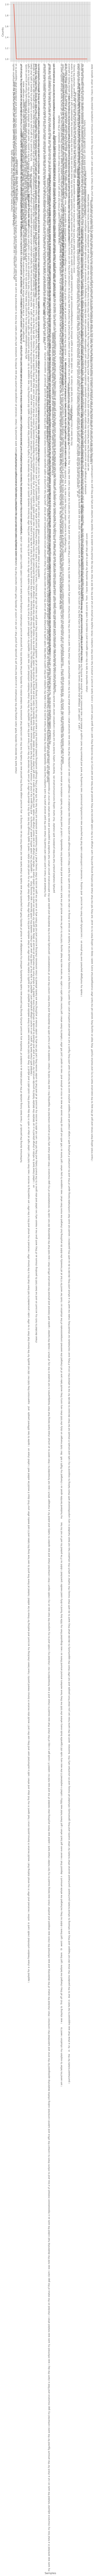

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
count = nltk.FreqDist(df_clean.complaint_text.values)
count.plot(30)

In [35]:
final_doc = df_clean['complaint_text']
all_documents = tuple(final_doc)

In [36]:
all_documents

('i am very dissatisfied with the results of my complaint it was against washington mutual whose loans were assumed by chase i received an unsigned document that was written by someone who had not taken the time to understand the scam we were drawn into i have responded and am sending the cfpb a copy and requesting a followup inquiry to assure someone at chase takes the time to review and understand what happened to us',
 'chase bank has denied my identity theft claim stating that the information is accurate but have yet to provide any proof that i am not a victim of identity theft chase claimed that the slate account ending in  was opened on this account was fraudulently used a result of identity theft \n\nfurthermore during the periods of  i have been living outside of the united states as a resident of  therefore any account activity during this period was made fraudulently without my knowledge as a result of identity theft any payments that was made to chase bank was not made from 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(257, 4050)
  (0, 3826)	0.11519647562944331
  (0, 1599)	0.13061621461669837
  (0, 3950)	0.08733179552117042
  (0, 3101)	0.12467858816257224
  (0, 3531)	0.16450500724241215
  (0, 284)	0.06307562995134755
  (0, 281)	0.2024633408793977
  (0, 1819)	0.15049571569299308
  (0, 1425)	0.16450500724241215
  (0, 3038)	0.1328460956612182
  (0, 791)	0.12852156335049583
  (0, 566)	0.12852156335049583
  (0, 3228)	0.1435623095331614
  (0, 182)	0.11245361664328217
  (0, 3071)	0.15049571569299308
  (0, 1615)	0.04776614118289559
  (0, 1867)	0.08795435586440097
  (0, 1122)	0.16450500724241215
  (0, 3930)	0.08858833996844108
  (0, 3168)	0.15456525670426483
  (0, 3767)	0.27558079282940123
  (0, 3650)	0.14762505287734823
  (0, 3639)	0.14501899578151747
  (0, 3530)	0.13779039641470062
  (0, 2344)	0.046230281032940995
  :	:
  (256, 1097)	0.15652639889855624
  (256, 121)	0.1868598530386244
  (256, 648)	0.13919225108029348
  (256, 4036)	0.16608637886289257
  (256, 3598)	0.21472663256395144
  (256, 3972)	0.132399

In [38]:
import numpy
numpy.random.bit_generator = numpy.random._bit_generator

AttributeError: module 'numpy.random' has no attribute '_bit_generator'

In [ ]:
!pip uninstall numpy==1.15.4

In [ ]:
! pip install numpy==1.19.2

In [ ]:
np.__version__

In [39]:
reindexed_data= df_clean['complaint_text']

data_text = df_clean[['complaint_text']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

257
                                          complaint_text  index
29932  i am very dissatisfied with the results of my ...  29932
4650   chase bank has denied my identity theft claim ...   4650
70099  payment was made to    who transferred my loan...  70099
5052   i have been calling and emailing chase mortgag...   5052
41838  jp morgan chase and   in the executive offices...  41838


In [41]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 29932].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['complaint_text'].map(preprocess)
processed_docs[:5]

original document: 
['i', 'am', 'very', 'dissatisfied', 'with', 'the', 'results', 'of', 'my', 'complaint', 'it', 'was', 'against', 'washington', 'mutual', 'whose', 'loans', 'were', 'assumed', 'by', 'chase', 'i', 'received', 'an', 'unsigned', 'document', 'that', 'was', 'written', 'by', 'someone', 'who', 'had', 'not', 'taken', 'the', 'time', 'to', 'understand', 'the', 'scam', 'we', 'were', 'drawn', 'into', 'i', 'have', 'responded', 'and', 'am', 'sending', 'the', 'cfpb', 'a', 'copy', 'and', 'requesting', 'a', 'followup', 'inquiry', 'to', 'assure', 'someone', 'at', 'chase', 'takes', 'the', 'time', 'to', 'review', 'and', 'understand', 'what', 'happened', 'to', 'us']


 tokenized and lemmatized document: 
['dissatisfi', 'result', 'complaint', 'washington', 'mutual', 'loan', 'assum', 'chase', 'receiv', 'unsign', 'document', 'write', 'take', 'time', 'understand', 'scam', 'draw', 'respond', 'send', 'cfpb', 'copi', 'request', 'followup', 'inquiri', 'assur', 'chase', 'take', 'time', 'review', 'un

29932    [dissatisfi, result, complaint, washington, mu...
4650     [chase, bank, deni, ident, theft, claim, state...
70099    [payment, transfer, loan, notifi, transfer, se...
5052     [call, email, chase, mortgag, daili, hour, yes...
41838    [morgan, chase, execut, offic, uncoop, refus, ...
Name: complaint_text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

In [42]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 assum
1 assur
2 cfpb
3 chase
4 complaint
5 copi
6 dissatisfi
7 document
8 draw
9 followup
10 happen


In [43]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(3, 1),
 (4, 1),
 (5, 5),
 (6, 2),
 (12, 2),
 (13, 1),
 (18, 3),
 (21, 5),
 (22, 2),
 (24, 1),
 (28, 1),
 (32, 9),
 (34, 1),
 (36, 5),
 (39, 1),
 (40, 2),
 (41, 4),
 (44, 2),
 (45, 1),
 (49, 2),
 (50, 4),
 (53, 7),
 (54, 1),
 (56, 1),
 (58, 14),
 (59, 2),
 (62, 5),
 (63, 2),
 (66, 3),
 (71, 2),
 (72, 3),
 (73, 3),
 (80, 2),
 (81, 5),
 (84, 7),
 (87, 7),
 (88, 1),
 (96, 1),
 (97, 1),
 (100, 1),
 (109, 3),
 (114, 1),
 (117, 1),
 (124, 1),
 (126, 1),
 (135, 1),
 (136, 2),
 (139, 2),
 (141, 3),
 (145, 6),
 (146, 1),
 (152, 1),
 (162, 3),
 (172, 1),
 (178, 3),
 (181, 1),
 (182, 2),
 (184, 2),
 (185, 1),
 (188, 1),
 (196, 1),
 (197, 1),
 (202, 1),
 (204, 1),
 (207, 1)]

In [44]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 3 ("document") appears 1 time.
Word 4 ("happen") appears 1 time.
Word 5 ("loan") appears 5 time.
Word 6 ("receiv") appears 2 time.
Word 12 ("time") appears 2 time.
Word 13 ("understand") appears 1 time.
Word 18 ("bank") appears 3 time.
Word 21 ("credit") appears 5 time.
Word 22 ("debt") appears 2 time.
Word 24 ("email") appears 1 time.
Word 28 ("includ") appears 1 time.
Word 32 ("payment") appears 9 time.
Word 34 ("provid") appears 1 time.
Word 36 ("report") appears 5 time.
Word 39 ("year") appears 1 time.
Word 40 ("address") appears 2 time.
Word 41 ("check") appears 4 time.
Word 44 ("notifi") appears 2 time.
Word 45 ("properti") appears 1 time.
Word 49 ("ask") appears 2 time.
Word 50 ("call") appears 4 time.
Word 53 ("explain") appears 7 time.
Word 54 ("help") appears 1 time.
Word 56 ("late") appears 1 time.
Word 58 ("mortgag") appears 14 time.
Word 59 ("need") appears 2 time.
Word 62 ("say") appears 5 time.
Word 63 ("thing") appears 2 time.
Word 66 ("financi") appears 3 time.
Wo

In [45]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2812962025628787),
 (1, 0.16999172877060822),
 (2, 0.26936316764181156),
 (3, 0.17212472751499602),
 (4, 0.2402170329917662),
 (5, 0.1811363262640087),
 (6, 0.10082731066338899),
 (7, 0.14244111840470916),
 (8, 0.2445289049201504),
 (9, 0.2402170329917662),
 (10, 0.12211042813815304),
 (11, 0.3530607300397017),
 (12, 0.18924498500491718),
 (13, 0.5756696776242425),
 (14, 0.21107089834172074)]


In [46]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [47]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.053*"charg" + 0.042*"card" + 0.040*"credit" + 0.026*"bank" + 0.019*"disput"'), (1, '0.059*"bank" + 0.041*"check" + 0.023*"tell" + 0.022*"close" + 0.019*"payment"'), (2, '0.070*"card" + 0.060*"credit" + 0.025*"receiv" + 0.023*"bank" + 0.018*"inform"'), (3, '0.036*"payment" + 0.028*"loan" + 0.023*"receiv" + 0.023*"bank" + 0.023*"time"'), (4, '0.033*"credit" + 0.031*"inform" + 0.027*"charg" + 0.019*"call" + 0.018*"time"')]
Topic: 0 
Words: 0.053*"charg" + 0.042*"card" + 0.040*"credit" + 0.026*"bank" + 0.019*"disput" + 0.018*"mortgag" + 0.016*"receiv" + 0.015*"tell" + 0.015*"call" + 0.014*"time"
Topic: 1 
Words: 0.059*"bank" + 0.041*"check" + 0.023*"tell" + 0.022*"close" + 0.019*"payment" + 0.017*"say" + 0.017*"fund" + 0.016*"call" + 0.013*"send" + 0.013*"deposit"
Topic: 2 
Words: 0.070*"card" + 0.060*"credit" + 0.025*"receiv" + 0.023*"bank" + 0.018*"inform" + 0.016*"offer" + 0.015*"tell" + 0.015*"chang" + 0.015*"call" + 0.013*"time"
Topic: 3 
Words: 0.036*"payment" + 0.028*"loan" 

In [48]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [1]:
! pip install pyLDAvis

ERROR: Could not find a version that satisfies the requirement pyLDAvis (from versions: none)
ERROR: No matching distribution found for pyLDAvis


In [ ]:
import numpy as np

In [50]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [51]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(59, 5)
(5, 59)


In [52]:
df_lda

charg      card    credit      bank    disput   mortgag    receiv  \
0  0.052857  0.042059  0.039719  0.026027  0.019191  0.018108  0.015890   
1  0.000000  0.000000  0.011343  0.059090  0.000000  0.008824  0.010526   
2  0.000000  0.069715  0.060105  0.022863  0.000000  0.000000  0.024740   
3  0.014701  0.015465  0.015699  0.022909  0.000000  0.000000  0.023448   
4  0.027280  0.013752  0.032656  0.012489  0.000000  0.000000  0.016632   

       tell      call      time   request    balanc   payment     check  \
0  0.014972  0.014782  0.013778  0.012853  0.012514  0.012070  0.011847   
1  0.023362  0.015685  0.013216  0.000000  0.000000  0.018728  0.040949   
2  0.015294  0.014586  0.013208  0.011559  0.000000  0.000000  0.000000   
3  0.000000  0.011274  0.022529  0.000000  0.000000  0.035752  0.018258   
4  0.017193  0.019338  0.018214  0.015494  0.000000  0.013401  0.000000   

    compani     phone     fraud      loan      work    servic    number  \
0  0.010922  0.010824  0.010509  0.010323  0.010194  0.010026  0.009494   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.009333   
2  0.000000  0.000000  0.000000  0.009571  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.028055  0.000000  0.016142  0.000000   
4  0.000000  0.000000  0.000000  0.013099  0.000000  0.000000  0.000000   

      state     email  document      year     close       say      fund  \
0  0.009262  0.009056  0.008919  0.008785  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.021541  0.017119  0.016985   
2  0.011436  0.000000  0.000000  0.000000  0.011753  0.012610  0.000000   
3  0.020628  0.000000  0.000000  0.022250  0.000000  0.000000  0.000000   
4  0.009542  0.009708  0.014923  0.000000  0.010225  0.016686  0.000000   

       send   deposit       ask     money    inform   contact       day  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.013385  0.013323  0.012717  0.010781  0.010388  0.010307  0.009418   
2  0.011327  0.000000  0.000000  0.000000  0.018144  0.010598  0.000000   
3  0.015010  0.000000  0.000000  0.012522  0.000000  0.000000  0.000000   
4  0.016777  0.000000  0.000000  0.011220  0.030622  0.000000  0.000000   

        fee      need    branch      issu  transact     offer     chang  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.009217  0.008826  0.008769  0.008753  0.008519  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.015724  0.015203   
3  0.000000  0.000000  0.000000  0.011468  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.011297  0.000000  0.000000   

    purchas     claim     appli    report      file      item    letter  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.012897  0.012741  0.010881  0.010535  0.010427  0.009271  0.008992   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.017910   
4  0.000000  0.014243  0.000000  0.010169  0.000000  0.000000  0.010971   

    fraudul    record      home        go       pay      late     month  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.008707  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.015734  0.015621  0.014355  0.014241  0.013442  0.013397   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     custom      know    provid  
0  0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  
3  0.011142  0.010106  0.000000  
4  0.010149  0.000000  0.016859

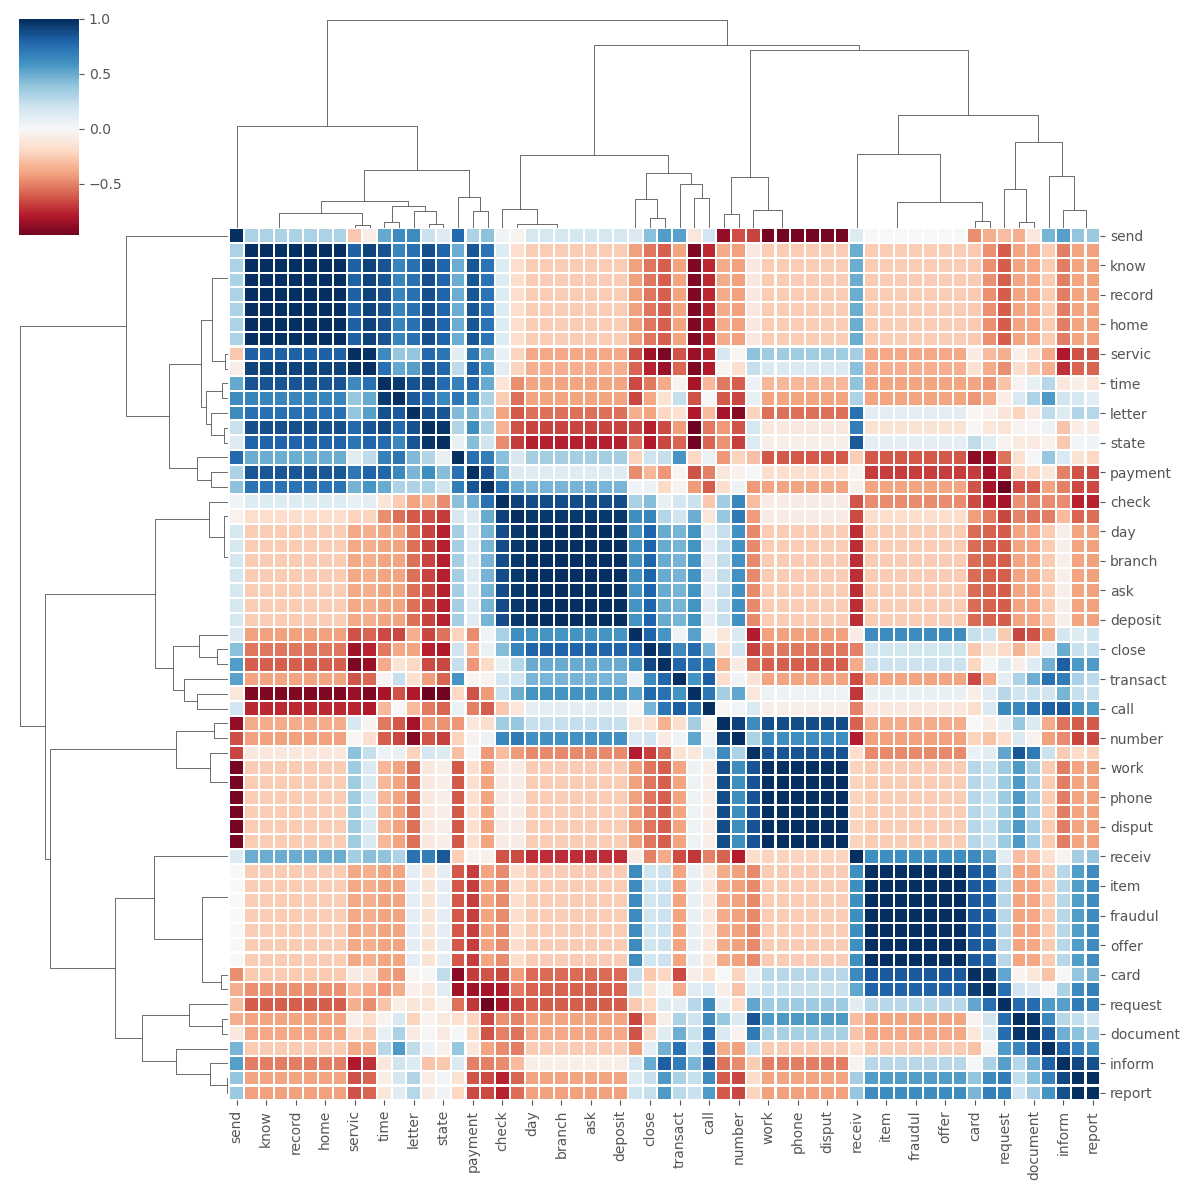

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

## Deep Learning ##

In [57]:
df_clean

complaint_text  \
29932  i am very dissatisfied with the results of my ...   
4650   chase bank has denied my identity theft claim ...   
70099  payment was made to    who transferred my loan...   
5052   i have been calling and emailing chase mortgag...   
41838  jp morgan chase and   in the executive offices...   
71875  i applied for a chase freedom unlimited credit...   
40481  i banked with chase bank for years i am a rece...   
14434  on  i called chase bank to refute a charge pla...   
25908  chase decided to lock my account on and ive be...   
22025  i have disputed charges that were not mine bac...   
55994  i applied for a chase sapphire reserve credit ...   
33122  they called and said someone had charged my ca...   
61722  my husband and i have a joint credit card issu...   
54232  my auto was wrecked in a total loss my insuran...   
34333  i filed a dispute in regards to the incorrect ...   
72297  my husband  sudden departed this life on   he ...   
73205    partially installed product had horrible pro...   
28408  this account is being reported inaccurately i ...   
1201   a loan request  refinance  was done it was den...   
5226   i am send his letter to explain my situation i...   
48817  i authorized  to autocharge my account for whe...   
71719  case number   this is the submission of   disp...   
24429  i purchased tickets for the   in  for a show t...   
3629   this has been a reoccurring problem i have had...   
34098  on at  i withdrew from the chase bank atm loca...   
14884  on i deposited a check in my account and my ac...   
72179  i got a   credit card  mileage plus explorer i...   
70001  i was charged a foreign transaction fee of  on...   
22523  on at   i received an email with the subject l...   
58326  i made my mortgage payment over the phone on  ...   
31943  i have submitted documents to chase to refinan...   
54247  i am a non customer of this financial institut...   
17819  i have a chase credit card where i make a mini...   
73794  on  i ordered a sterling silver pendant and a ...   
10684  received voice mail message stating my amazon ...   
25701  just today chase credit card has called my par...   
39775  a chapter  bankruptcy filed in  was discharged...   
32136  this is an additional complaint from an origin...   
19209  my credit limit was reduced on my chase credit...   
6063   this account was opened fraudulently under the...   
32868  to  consumer finance protection bureau  i trav...   
70959  i applied for a chase   credit card at first c...   
48062  on  i contacted chase card services regarding ...   
30064  well chase has decided not to do business with...   
34681  chase closed my account without acknowledging ...   
1603   loan officer   of             nevada   and act...   
54625  i always pay my credit card bills in full plus...   
7899   i arranged payment in full on my chase  card f...   
21460  when i received my  statement from chase for v...   
70563  the primary reason for my complaint is that ch...   
17074  on  i was having dinner at my familys house wh...   
4315   i logged into my   and its been forever and i ...   
22232  i received an offe r for a marriott rewards pr...   
55565  i went into a chase branch where a banker info...   
14165  i have been a customer of jp morgan chase via ...   
70609  received from chase bank an unsolicited amazon...   
1019   years ago we were informed we needed flood ins...   
62003  i have never open any credit cards by chase ba...   
47191  i called customer service last  about the non ...   
72299  i signed up for the new chase sapphire reserve...   
55011  i was attempting to assume a mortgage loan fro...   
75594  i received a pre approval credit card from cha...   
70782  m account was hacked and the bank froze dollar...   
41769  on   i received a letter dated   from chase st...   
25095  i received a debit card in the mail in regards...   
71064  i purchased my home   with   bank as the lende...   
17856  on three separa

In [88]:
MAX_LENGTH = 1000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_clean.complaint_text.values)
post_seq = tokenizer.texts_to_sequences(df_clean.complaint_text.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [89]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# This is fixed.
EMBEDDING_DIM = 100

In [90]:
y = pd.get_dummies(df_clean['category'].values)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05,random_state=42)

## Deep Learning Model ##

In [92]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(244, 1000) (244, 34)
(13, 1000) (13, 34)


In [97]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=post_seq_padded.shape[1]))
##model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.4)) ##recurrent_dropout=0.2)##
model.add(Dense(34, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 100)         5000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 34)                3434      
Total params: 5,083,834
Trainable params: 5,083,834
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
epochs = 100
batch_size = 20

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3,min_delta=0.0001)])

Train on 219 samples, validate on 25 samples
Epoch 1/100
219/219 [==============================] - 18s 81ms/step - loss: 3.1236 - accuracy: 0.1781 - val_loss: 3.1100 - val_accuracy: 0.2000
Epoch 2/100
219/219 [==============================] - 17s 78ms/step - loss: 2.5660 - accuracy: 0.2466 - val_loss: 2.3908 - val_accuracy: 0.2000
Epoch 3/100
219/219 [==============================] - 16s 73ms/step - loss: 2.2728 - accuracy: 0.2374 - val_loss: 2.3396 - val_accuracy: 0.2800
Epoch 4/100
219/219 [==============================] - 16s 75ms/step - loss: 2.2392 - accuracy: 0.1963 - val_loss: 2.4238 - val_accuracy: 0.2000
Epoch 5/100
219/219 [==============================] - 17s 76ms/step - loss: 2.2155 - accuracy: 0.2466 - val_loss: 2.3777 - val_accuracy: 0.2000
Epoch 6/100
219/219 [==============================] - 17s 80ms/step - loss: 2.1869 - accuracy: 0.2466 - val_loss: 2.4083 - val_accuracy: 0.2000


In [100]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

13/13 [==============================] - 0s 29ms/step
Test set
  Loss: 1.994
  Accuracy: 0.308


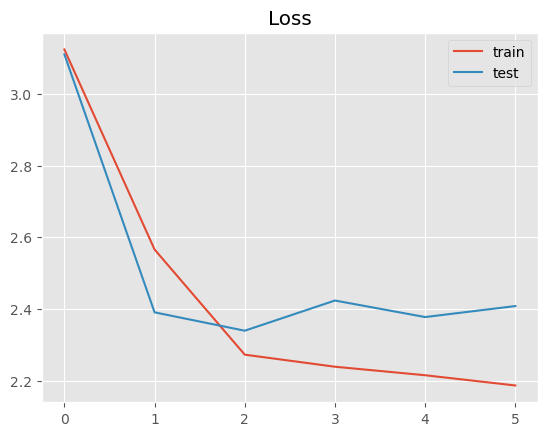

In [101]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

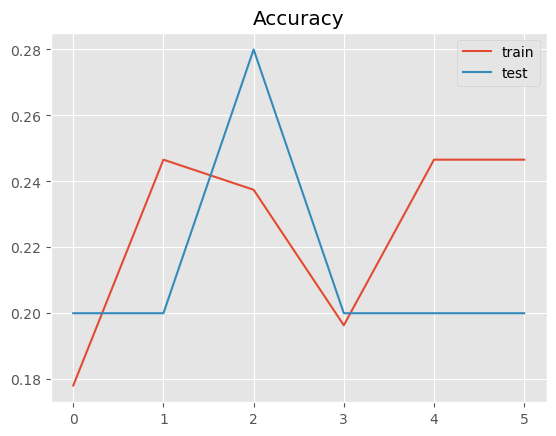

In [103]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [105]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[0.06216427 0.00535011 0.00563039 0.20218524 0.00561874 0.00474753
  0.0113341  0.00574706 0.26310337 0.00705245 0.00183321 0.0046658
  0.09737937 0.00641055 0.00500745 0.0145109  0.00497292 0.0049545
  0.00129626 0.01269379 0.00481922 0.00672611 0.01081562 0.07492262
  0.06212899 0.02328433 0.0057959  0.00391655 0.02046817 0.01587543
  0.01149864 0.01211566 0.00989747 0.01107721]] Payday loan, title loan, or personal loan
